In [19]:
import pandas
import seaborn as sns

In [20]:
df = pandas.load('/Users/Gilles/Dropbox/Science/tdcs/data/all_data.pandas')
df['response regime'] = df['acc_spd'].map({'acc':'accuracy', 'spd':'speed'})

## RT

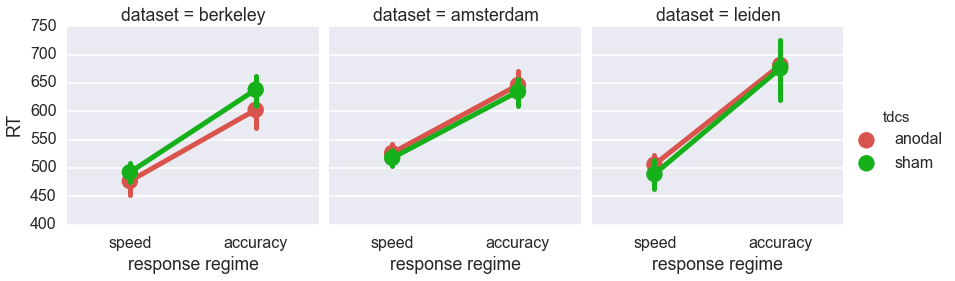

In [22]:
sns.set_context('poster')
sns.set_palette([sns.xkcd_rgb["pale red"], sns.xkcd_rgb["green"]])
sns.factorplot('response regime', 'RT', 'tdcs', df, col='dataset', units='subj_idx', col_order=['berkeley', 'amsterdam', 'leiden'], hue_order=['anodal', 'sham'], ci=67)

plt.savefig('figure1.svg', transparent=True)
plt.savefig('figure1.eps', transparent=True)
plt.savefig('figure1.png', dpi=300)
plt.savefig('figure1.tif', dpi=300)

In [4]:
%load_ext rpy2.ipython

Error in library(vimcom) : there is no package called ‘vimcom’


In [5]:
df.subj_idx = df.subj_idx.astype(str)

### Berkeley

In [6]:
df_meaned = df[df.dataset == 'berkeley'].groupby(['subj_idx', 'acc_spd', 'tdcs'], as_index=False).mean()
df_meaned.groupby(['acc_spd', 'tdcs']).size()

acc_spd  tdcs  
acc      anodal    15
         sham      15
spd      anodal    15
         sham      15
dtype: int64

In [7]:
%%R -i df_meaned

library("BayesFactor")

res = aov(RT ~ acc_spd*tdcs  + Error(subj_idx), data=df_meaned)
print(summary(res))

names(res) = c("trt", "err")
res


bf = anovaBF(RT ~ acc_spd*tdcs , data=df_meaned, whichRandom="subj_idx", whichModels="top")

print(bf)
print(1/bf)

#print(bf[1] / bf[4])
#print(bf[2] / bf[4])
#print(bf[4] / bf[3])

Loading required package: coda
Loading required package: Matrix
************
Welcome to BayesFactor 0.9.11-1. If you have questions, please contact Richard Morey (richarddmorey@gmail.com).

Type BFManual() to open the manual.
************

Error: subj_idx
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 14 393570   28112               

Error: Within
             Df Sum Sq Mean Sq F value   Pr(>F)    
acc_spd       1 268088  268088  59.391 1.44e-09 ***
tdcs          1   8900    8900   1.972    0.168    
acc_spd:tdcs  1   1973    1973   0.437    0.512    
Residuals    42 189586    4514                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  |======================================================================| 100%
Bayes factor top-down analysis
--------------
When effect is omitted from acc_spd + tdcs + acc_spd:tdcs , BF is...
[1] Omit acc_spd:tdcs : 2.670724     ±2.48%
[2] Omit tdcs         : 2.702799     ±2.95%
[3] Omit acc_spd      : 0.0002200

In [8]:
4170.034   / 1179.704 

3.534813817703424

## Amsterdam

In [9]:
df_meaned = df[df.dataset == 'amsterdam'].groupby(['subj_idx', 'acc_spd', 'tdcs'], as_index=False).mean()
df_meaned.groupby(['acc_spd', 'tdcs']).size()

acc_spd  tdcs  
acc      anodal    15
         sham      15
spd      anodal    15
         sham      15
dtype: int64

In [10]:
%%R -i df_meaned

library("BayesFactor")
print(summary(aov(RT ~ acc_spd*tdcs  + Error(subj_idx), data=df_meaned)))

bf = anovaBF(RT ~ acc_spd*tdcs , data=df_meaned, whichRandom="subj_idx", whichModels="top")

print(bf)
print(1/bf)

print(bf[1] / bf[4])
print(bf[2] / bf[4])
print(bf[4] / bf[3])


Error: subj_idx
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 14 219226   15659               

Error: Within
             Df Sum Sq Mean Sq F value   Pr(>F)    
acc_spd       1 206694  206694  64.502 5.06e-10 ***
tdcs          1   1596    1596   0.498    0.484    
acc_spd:tdcs  1     64      64   0.020    0.888    
Residuals    42 134586    3204                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  |======================================================================| 100%
Bayes factor top-down analysis
--------------
When effect is omitted from acc_spd + tdcs + acc_spd:tdcs , BF is...
[1] Omit acc_spd:tdcs : 2.765425     ±6.8%
[2] Omit tdcs         : 3.289868     ±6.63%
[3] Omit acc_spd      : 2.308156e-05 ±8.14%

Against denominator:
  RT ~ acc_spd + tdcs + acc_spd:tdcs 
---
Bayes factor type: BFlinearModel, JZS

                               denominator
numerator                       acc_spd + tdcs acc_spd + acc_spd:tdcs
  acc_spd + t

### Leiden

In [11]:
df_meaned = df[df.dataset == 'leiden'].groupby(['subj_idx', 'acc_spd', 'tdcs'], as_index=False).mean()

In [12]:
%%R -i df_meaned

library("BayesFactor")
print(summary(aov(RT ~ acc_spd*tdcs  + Error(subj_idx), data=df_meaned)))

bf = anovaBF(RT ~ acc_spd*tdcs , data=df_meaned, whichRandom="subj_idx", whichModels="top")

print(bf)
print(1/bf)

print(bf[1] / bf[4])
print(bf[2] / bf[4])
print(bf[4] / bf[3])


Error: subj_idx
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 13 583832   44910               

Error: Within
             Df Sum Sq Mean Sq F value   Pr(>F)    
acc_spd       1 452162  452162  53.400 8.14e-09 ***
tdcs          1   1996    1996   0.236    0.630    
acc_spd:tdcs  1    273     273   0.032    0.859    
Residuals    39 330233    8468                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  |======================================================================| 100%
Bayes factor top-down analysis
--------------
When effect is omitted from acc_spd + tdcs + acc_spd:tdcs , BF is...
[1] Omit acc_spd:tdcs : 2.734364     ±7.18%
[2] Omit tdcs         : 3.4751       ±7%
[3] Omit acc_spd      : 0.0002311999 ±7.02%

Against denominator:
  RT ~ acc_spd + tdcs + acc_spd:tdcs 
---
Bayes factor type: BFlinearModel, JZS

                               denominator
numerator                       acc_spd + tdcs acc_spd + acc_spd:tdcs
  acc_spd + tdc

### All datasets

In [13]:
df.head()

,RT,acc_spd,accuracy,angle,block,coherence,dataset,id,left_right,subj_idx,tdcs,trial_NR,response regime
0,799,spd,1,180,1,0.4171,berkeley,S1.1,2,1,sham,1,speed
1,613,spd,1,180,1,0.4171,berkeley,S1.1,2,1,sham,2,speed
2,627,spd,1,180,1,0.4171,berkeley,S1.1,1,1,sham,3,speed
3,1280,acc,0,180,1,0.4171,berkeley,S1.1,1,1,sham,4,accuracy
4,800,spd,1,180,1,0.4171,berkeley,S1.1,2,1,sham,5,speed


In [14]:
df_meaned = df.groupby(['id', 'dataset', 'acc_spd', 'tdcs'], as_index=False).mean()
df_meaned.groupby(['acc_spd', 'tdcs']).size()

acc_spd  tdcs  
acc      anodal    44
         sham      44
spd      anodal    44
         sham      44
dtype: int64

In [15]:
df_meaned.groupby(['acc_spd']).mean()

,RT,accuracy,angle,coherence,left_right,trial_NR
acc_spd,,,,,,
acc,644.983277,0.764919,180,0.219727,1.502979,302.542955
spd,502.207791,0.700645,180,0.219727,1.497094,298.453988


In [16]:
%%R -i df_meaned

library("BayesFactor")
print(summary(aov(RT ~ acc_spd*tdcs  + Error(id + dataset), data=df_meaned)))

bf = anovaBF(RT ~ acc_spd*tdcs , data=df_meaned, whichRandom=c("id", "dataset"), whichModels="top")

print(bf)
print(1/bf)

print(bf[1] / bf[4])
print(bf[2] / bf[4])
print(bf[4] / bf[3])


Error: id
          Df  Sum Sq Mean Sq F value Pr(>F)
tdcs       1      43      43   0.003  0.959
Residuals 86 1421232   16526               

Error: Within
             Df Sum Sq Mean Sq F value Pr(>F)    
acc_spd       1 896933  896933 149.550 <2e-16 ***
acc_spd:tdcs  1    934     934   0.156  0.694    
Residuals    86 515790    5998                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  |======================================================================| 100%
Bayes factor top-down analysis
--------------
When effect is omitted from acc_spd + tdcs + acc_spd:tdcs , BF is...
[1] Omit acc_spd:tdcs : 3.761267     ±17.11%
[2] Omit tdcs         : 5.366185     ±17.02%
[3] Omit acc_spd      : 7.943771e-14 ±17.06%

Against denominator:
  RT ~ acc_spd + tdcs + acc_spd:tdcs 
---
Bayes factor type: BFlinearModel, JZS

                               denominator
numerator                       acc_spd + tdcs acc_spd + acc_spd:tdcs
  acc_spd + tdcs + acc_spd:td

# Accuracy

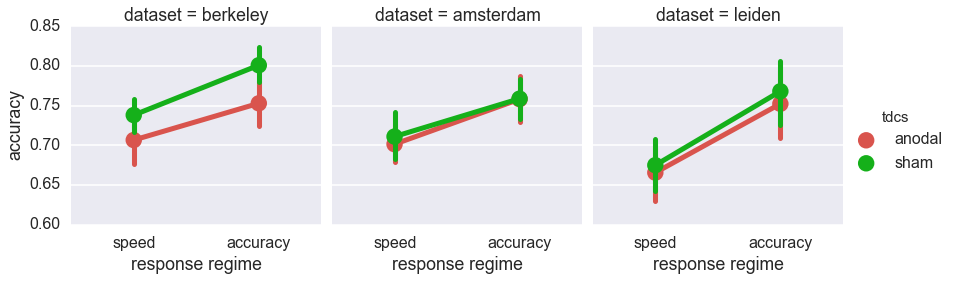

In [23]:
sns.set_context('poster')
sns.set_palette([sns.xkcd_rgb["pale red"], sns.xkcd_rgb["green"]])
sns.factorplot('response regime', 'accuracy', 'tdcs', df, col='dataset', units='subj_idx', col_order=['berkeley', 'amsterdam', 'leiden'], hue_order=['anodal', 'sham'], ci=67)

plt.savefig('figure2.svg', transparent=True)
plt.savefig('figure2.eps', transparent=True)
plt.savefig('figure2.png', dpi=300)
plt.savefig('figure2.tif', dpi=300)

## Berkeley

In [22]:
df_meaned = df[df.dataset == 'berkeley'].groupby(['subj_idx', 'acc_spd'], as_index=False).mean()

df_meaned['arcsine_accuracy'] = df_meaned.accuracy.apply(np.arcsin)
df_meaned.groupby(['acc_spd']).agg([np.mean, np.std])

RT              accuracy           angle     coherence  \
               mean         std      mean       std  mean std      mean   
acc_spd                                                                   
acc      619.243233  111.311778  0.776093  0.093075   180   0  0.201333   
spd      485.405714   77.546801  0.723121  0.095086   180   0  0.201333   

                  left_right              trial_NR           arcsine_accuracy  \
              std       mean       std        mean       std             mean   
acc_spd                                                                         
acc      0.094881   1.503326  0.012183  303.302864  5.336596         0.909755   
spd      0.094881   1.496878  0.012198  297.740870  5.137872         0.827492   

                   
              std  
acc_spd            
acc      0.184799  
spd      0.186171

In [18]:
df_meaned = df[df.dataset == 'berkeley'].groupby(['subj_idx', 'acc_spd', 'tdcs'], as_index=False).mean()

df_meaned['arcsine_accuracy'] = df_meaned.accuracy.apply(np.arcsin)
df_meaned.groupby(['acc_spd', 'tdcs']).mean()

RT  accuracy  angle  coherence  left_right  \
acc_spd tdcs                                                         
acc     anodal  601.424115  0.753072    180   0.201333    1.501072   
        sham    637.250420  0.800479    180   0.201333    1.505456   
spd     anodal  479.204293  0.707868    180   0.201333    1.498609   
        sham    492.093809  0.738194    180   0.201333    1.494944   

                  trial_NR  arcsine_accuracy  
acc_spd tdcs                                  
acc     anodal  302.539808          0.884738  
        sham    304.076559          0.947967  
spd     anodal  298.284526          0.811954  
        sham    297.170824          0.846601

In [296]:
%%R -i df_meaned

library("BayesFactor")
print(summary(aov(arcsine_accuracy ~ acc_spd*tdcs  + Error(subj_idx), data=df_meaned)))

bf = anovaBF(arcsine_accuracy ~ acc_spd*tdcs , data=df_meaned, whichRandom="subj_idx", whichModels="top")

print(bf)
print(1/bf)

print(bf[1] / bf[4])
print(bf[2] / bf[4])
print(bf[4] / bf[3])


Error: subj_idx
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 14  1.894  0.1353               

Error: Within
             Df Sum Sq Mean Sq F value   Pr(>F)    
acc_spd       1 0.1137 0.11373  14.193 0.000508 ***
tdcs          1 0.0359 0.03592   4.483 0.040190 *  
acc_spd:tdcs  1 0.0031 0.00306   0.382 0.539711    
Residuals    42 0.3365 0.00801                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  |======================================================================| 100%
Bayes factor top-down analysis
--------------
When effect is omitted from acc_spd + tdcs + acc_spd:tdcs , BF is...
[1] Omit acc_spd:tdcs : 2.803536 ±1.49%
[2] Omit tdcs         : 2.591122 ±1.49%
[3] Omit acc_spd      : 1.091608 ±2.05%

Against denominator:
  arcsine_accuracy ~ acc_spd + tdcs + acc_spd:tdcs 
---
Bayes factor type: BFlinearModel, JZS

                               denominator
numerator                       acc_spd + tdcs acc_spd + acc_spd:tdcs
  acc_spd 

## Amsterdam

In [297]:
df_meaned = df[df.dataset == 'amsterdam'].groupby(['subj_idx', 'acc_spd', 'tdcs'], as_index=False).mean()
df_meaned['arcsine_accuracy'] = df_meaned.accuracy.apply(np.arcsin)

df_meaned.groupby(['acc_spd', 'tdcs']).size()

acc_spd  tdcs  
acc      anodal    15
         sham      15
spd      anodal    15
         sham      15
dtype: int64

In [298]:
%%R -i df_meaned

library("BayesFactor")
print(summary(aov(arcsine_accuracy ~ acc_spd*tdcs  + Error(subj_idx), data=df_meaned)))

bf = anovaBF(arcsine_accuracy ~ acc_spd*tdcs , data=df_meaned, whichRandom="subj_idx", whichModels="top")

print(bf)
print(1/bf)

print(bf[1] / bf[4])
print(bf[2] / bf[4])
print(bf[4] / bf[3])


Error: subj_idx
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 14  1.278 0.09127               

Error: Within
             Df  Sum Sq Mean Sq F value   Pr(>F)    
acc_spd       1 0.10105 0.10105  21.424 3.52e-05 ***
tdcs          1 0.00057 0.00057   0.121    0.729    
acc_spd:tdcs  1 0.00115 0.00115   0.244    0.624    
Residuals    42 0.19810 0.00472                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  |======================================================================| 100%
Bayes factor top-down analysis
--------------
When effect is omitted from acc_spd + tdcs + acc_spd:tdcs , BF is...
[1] Omit acc_spd:tdcs : 3.201593 ±4.25%
[2] Omit tdcs         : 3.978056 ±2.74%
[3] Omit acc_spd      : 0.800123 ±4.35%

Against denominator:
  arcsine_accuracy ~ acc_spd + tdcs + acc_spd:tdcs 
---
Bayes factor type: BFlinearModel, JZS

                               denominator
numerator                       acc_spd + tdcs acc_spd + acc_spd:tdcs
  acc

### Leiden

In [299]:
df_meaned = df[df.dataset == 'leiden'].groupby(['subj_idx', 'acc_spd', 'tdcs'], as_index=False).mean()
df_meaned['arcsine_accuracy'] = df_meaned.accuracy.apply(np.arcsin)

df_meaned.groupby(['acc_spd', 'tdcs']).size()

acc_spd  tdcs  
acc      anodal    14
         sham      14
spd      anodal    14
         sham      14
dtype: int64

In [300]:
df_meaned.head()

,subj_idx,acc_spd,tdcs,RT,accuracy,angle,coherence,left_right,trial_NR,arcsine_accuracy
0,1,acc,anodal,789.293729,0.960396,180,0.2864,1.511551,310.181518,1.288420
1,1,acc,sham,727.930159,0.977778,180,0.2864,1.501587,307.838095,1.359585
2,1,spd,anodal,547.451178,0.902357,180,0.2864,1.488215,290.622896,1.125207
3,1,spd,sham,483.508772,0.873684,180,0.2864,1.498246,292.389474,1.062725
4,10,acc,anodal,487.883117,0.798701,180,0.1960,1.487013,303.090909,0.925134


In [301]:
%%R -i df_meaned

library("BayesFactor")

print(summary(aov(accuracy ~ acc_spd*tdcs  + Error(subj_idx), data=df_meaned)))

bf = anovaBF(arcsine_accuracy ~ acc_spd*tdcs , data=df_meaned, whichRandom="subj_idx", whichModels="top")

print(bf)
print(1/bf)

print(bf[1] / bf[4])
print(bf[2] / bf[4])
print(bf[4] / bf[3])


Error: subj_idx
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 13 0.9694 0.07457               

Error: Within
             Df  Sum Sq Mean Sq F value   Pr(>F)    
acc_spd       1 0.10732 0.10732  20.525 5.44e-05 ***
tdcs          1 0.00219 0.00219   0.420    0.521    
acc_spd:tdcs  1 0.00006 0.00006   0.012    0.915    
Residuals    39 0.20392 0.00523                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  |======================================================================| 100%
Bayes factor top-down analysis
--------------
When effect is omitted from acc_spd + tdcs + acc_spd:tdcs , BF is...
[1] Omit acc_spd:tdcs : 2.936768  ±2.92%
[2] Omit tdcs         : 3.793604  ±2.42%
[3] Omit acc_spd      : 0.3009455 ±2.61%

Against denominator:
  arcsine_accuracy ~ acc_spd + tdcs + acc_spd:tdcs 
---
Bayes factor type: BFlinearModel, JZS

                               denominator
numerator                       acc_spd + tdcs acc_spd + acc_spd:tdcs
  

### All datasets

In [305]:
df_meaned = df.groupby(['id', 'dataset', 'acc_spd', 'tdcs'], as_index=False).mean()
df_meaned['arcsine_accuracy'] = df_meaned.accuracy.apply(np.arcsin)

df_meaned.groupby(['acc_spd', 'tdcs']).size()

acc_spd  tdcs  
acc      anodal    44
         sham      44
spd      anodal    44
         sham      44
dtype: int64

In [306]:
%%R -i df_meaned

library("BayesFactor")
print(summary(aov(arcsine_accuracy ~ acc_spd*tdcs  + Error(id*dataset), data=df_meaned)))

bf = anovaBF(arcsine_accuracy ~ acc_spd*tdcs , data=df_meaned, whichRandom=c("id", "dataset"), whichModel="top")

print(bf)
print(1/bf)

print(bf[1] / bf[3])
print(bf[2] / bf[3])
print(bf[4] / bf[3])


Error: id
          Df Sum Sq Mean Sq F value Pr(>F)
tdcs       1  0.023 0.02313   0.328  0.568
Residuals 86  6.058 0.07044               

Error: Within
             Df Sum Sq Mean Sq F value   Pr(>F)    
acc_spd       1 0.5113  0.5113  55.828 6.11e-11 ***
acc_spd:tdcs  1 0.0002  0.0002   0.022    0.883    
Residuals    86 0.7876  0.0092                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  |======================================================================| 100%
Bayes factor top-down analysis
--------------
When effect is omitted from acc_spd + tdcs + acc_spd:tdcs , BF is...
[1] Omit acc_spd:tdcs : 5.047143   ±8.32%
[2] Omit tdcs         : 6.606768   ±29.73%
[3] Omit acc_spd      : 0.01729754 ±4.85%

Against denominator:
  arcsine_accuracy ~ acc_spd + tdcs + acc_spd:tdcs 
---
Bayes factor type: BFlinearModel, JZS

                               denominator
numerator                       acc_spd + tdcs acc_spd + acc_spd:tdcs
  acc_spd + tdcs +

# Threshold parameter

In [9]:
import pickle as pkl

In [10]:
params = pkl.load(open('/Users/Gilles/Dropbox/Science/tdcs/data/fitted_params_fastdm.pkl'))

In [11]:
par_df = pandas.DataFrame()

pars = ['t0', 'v', 'a', 'sv', 'szr', 'st0']

for p in pars:
    tmp = params.melted_parameters(p)
    tmp['variable'] = p
#    tmp.rename(columns={p:'value'}, inplace=True)
    par_df = pandas.concat((tmp, par_df))

par_df['dataset'] = par_df.subj_idx.apply(lambda row: row[0]).map({'S':'Berkeley', 'L':'Leiden', 'A':'Amsterdam'})
    
tmp  = par_df.groupby(['dataset', 'acc_spd', 'tdcs']).agg([np.mean, np.std])

In [12]:
r = []
for par in ['v', 'a', 'sv', 'szr']:
    r.append(pandas.DataFrame(tmp[par].apply(lambda row: '%.2f (%.2f)' % (row['mean'], row['std']), 1), columns=[par]))
    
for par in ['t0', 'st0']:
    r.append(pandas.DataFrame(tmp[par].apply(lambda row: '%.3f (%.3f)' % (row['mean'], row['std']), 1), columns=[par]))

pandas.concat(r, axis=1).to_excel('parameters.xlsx')
pandas.concat(r, axis=1)


v            a           sv          szr  \
dataset   acc_spd tdcs                                                         
Amsterdam acc     anodal  1.38 (0.84)  1.10 (0.12)  0.58 (0.19)  0.32 (0.11)   
                  sham    1.40 (0.67)  1.12 (0.18)  0.71 (0.12)  0.32 (0.10)   
          spd     anodal  1.29 (0.86)  0.89 (0.14)  0.65 (0.20)  0.30 (0.11)   
                  sham    1.28 (0.80)  0.92 (0.14)  0.61 (0.25)  0.33 (0.13)   
Berkeley  acc     anodal  1.53 (1.32)  1.06 (0.16)  0.62 (0.26)  0.33 (0.13)   
                  sham    1.66 (0.96)  1.14 (0.19)  0.68 (0.14)  0.27 (0.12)   
          spd     anodal  1.52 (1.35)  0.85 (0.17)  0.69 (0.27)  0.32 (0.11)   
                  sham    1.63 (0.96)  0.86 (0.13)  0.67 (0.23)  0.32 (0.13)   
Leiden    acc     anodal  1.35 (1.03)  1.21 (0.30)  0.71 (0.37)  0.34 (0.13)   
                  sham    1.44 (1.05)  1.14 (0.32)  0.61 (0.18)  0.34 (0.13)   
          spd     anodal  1.14 (0.93)  0.86 (0.14)  0.72 (0.26)  0.30 (0.11)   
                  sham    1.18 (0.99)  0.81 (0.11)  0.74 (0.18)  0.28 (0.16)   

                                     t0            st0  
dataset   acc_spd tdcs                                  
Amsterdam acc     anodal  0.403 (0.070)  0.209 (0.071)  
                  sham    0.385 (0.069)  0.209 (0.082)  
          spd     anodal  0.356 (0.043)  0.174 (0.079)  
                  sham    0.342 (0.044)  0.158 (0.075)  
Berkeley  acc     anodal  0.385 (0.090)  0.209 (0.137)  
                  sham    0.389 (0.083)  0.203 (0.102)  
          spd     anodal  0.334 (0.064)  0.138 (0.069)  
                  sham    0.345 (0.059)  0.147 (0.071)  
Leiden    acc     anodal  0.417 (0.110)  0.244 (0.100)  
                  sham    0.438 (0.114)  0.234 (0.119)  
          spd     anodal  0.347 (0.079)  0.137 (0.060)  
                  sham    0.348 (0.088)  0.128 (0.063)

In [13]:
df_par = params.melted_parameters('a')
df_par.head()

,subj_idx,a,acc_spd,tdcs
0,S1,1.1570,acc,anodal
1,S10,1.1559,acc,anodal
2,S11,0.9402,acc,anodal
3,S12,1.1644,acc,anodal
4,S13,1.2822,acc,anodal


In [14]:
df_par['dataset'] = df_par.subj_idx.map(lambda x: x[0])
df_par['dataset'] = df_par.dataset.map({'S':'berkeley',
                                        'A':'amsterdam',
                                        'L':'leiden'})

df_par['response regime'] = df_par['acc_spd'].map({'acc':'accuracy', 'spd':'speed'})

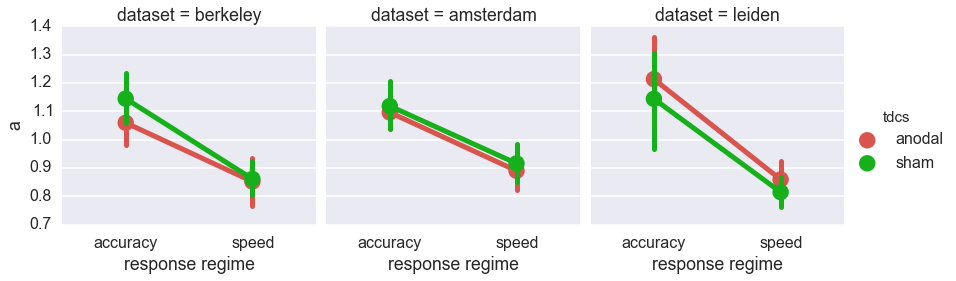

In [25]:
sns.factorplot('response regime','a','tdcs', df_par, col='dataset', hue_order=['anodal', 'sham'],
               col_order=['berkeley', 'amsterdam', 'leiden'])

plt.savefig('figure4.svg', transparent=True)
plt.savefig('figure4.eps', transparent=True)
plt.savefig('figure4.png', dpi=300)
plt.savefig('figure4.tif', dpi=300)

In [361]:
df_berkeley = df_par[(df_par.dataset == 'berkeley')]

In [362]:
%%R -i df_berkeley

library("BayesFactor")
print(summary(aov(a ~ acc_spd*tdcs  + Error(subj_idx), data=df_berkeley)))

bf = anovaBF(a ~ acc_spd*tdcs , data=df_berkeley, whichRandom="subj_idx", whichModels="top")
bf = recompute(bf, iterations = 500000)

print(bf)
print(1/bf)

print(bf[1] / bf[2])
#print(bf[2] / bf[3])


Error: subj_idx
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 14 0.6754 0.04824               

Error: Within
             Df Sum Sq Mean Sq F value   Pr(>F)    
acc_spd       1 0.9024  0.9024  47.778 1.94e-08 ***
tdcs          1 0.0333  0.0333   1.763    0.191    
acc_spd:tdcs  1 0.0217  0.0217   1.149    0.290    
Residuals    42 0.7933  0.0189                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  |======================================================================| 100%
  |======================================================================| 100%
Bayes factor top-down analysis
--------------
When effect is omitted from acc_spd + tdcs + acc_spd:tdcs , BF is...
[1] Omit acc_spd:tdcs : 2.0941       ±0.48%
[2] Omit tdcs         : 2.266869     ±0.72%
[3] Omit acc_spd      : 1.437255e-05 ±0.52%

Against denominator:
  a ~ acc_spd + tdcs + acc_spd:tdcs 
---
Bayes factor type: BFlinearModel, JZS

                               denominator
num

In [363]:
dfp = df_berkeley.pivot_table(index='subj_idx', columns=['acc_spd', 'tdcs'])

In [364]:
import scipy as sp
from scipy import stats

sp.stats.ttest_rel(dfp['a', 'acc', 'anodal'], dfp['a', 'acc', 'sham'], )

(-2.0150841737773941, 0.063515094266992672)

In [365]:
diff = (dfp['a', 'acc', 'anodal'] - dfp['a', 'acc', 'sham']).values

In [366]:
%%R -i diff
bfInterval = ttestBF(x = diff)
print(bfInterval)

bfInterval = ttestBF(x = diff, nullInterval=c(-Inf,0))
print(bfInterval)

Bayes factor analysis
--------------
[1] Alt., r=0.707 : 1.279447 ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS

Bayes factor analysis
--------------
[1] Alt., r=0.707 -Inf<d<0    : 2.455386  ±0%
[2] Alt., r=0.707 !(-Inf<d<0) : 0.1035078 ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS



## Amsterdam

In [367]:
df_amsterdam = df_par[(df_par.dataset == 'amsterdam')]

In [368]:
%%R -i df_amsterdam

library("BayesFactor")
print(summary(aov(a ~ acc_spd*tdcs  + Error(subj_idx), data=df_amsterdam)))

bf = anovaBF(a ~ acc_spd*tdcs , data=df_amsterdam, whichRandom="subj_idx", whichModel="top")

print(bf)
print(1/bf)

print(bf[1] / bf[3])


Error: subj_idx
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 14 0.5769 0.04121               

Error: Within
             Df Sum Sq Mean Sq F value   Pr(>F)    
acc_spd       1 0.6252  0.6252  43.527 5.49e-08 ***
tdcs          1 0.0087  0.0087   0.609    0.440    
acc_spd:tdcs  1 0.0000  0.0000   0.003    0.959    
Residuals    42 0.6032  0.0144                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  |======================================================================| 100%
Bayes factor top-down analysis
--------------
When effect is omitted from acc_spd + tdcs + acc_spd:tdcs , BF is...
[1] Omit acc_spd:tdcs : 2.80498      ±1.86%
[2] Omit tdcs         : 2.994908     ±1.77%
[3] Omit acc_spd      : 5.963895e-05 ±1.63%

Against denominator:
  a ~ acc_spd + tdcs + acc_spd:tdcs 
---
Bayes factor type: BFlinearModel, JZS

                               denominator
numerator                       acc_spd + tdcs acc_spd + acc_spd:tdcs
  acc_spd + t

In [369]:
dfp = df_amsterdam.pivot_table(index='subj_idx', columns=['acc_spd', 'tdcs'])
print sp.stats.ttest_rel(dfp['a', 'acc', 'anodal'], dfp['a', 'acc', 'sham'], )
diff = (dfp['a', 'acc', 'anodal'] - dfp['a', 'acc', 'sham']).values

(-0.5151507815542461, 0.6144850599834949)


In [370]:
%%R -i diff
bfInterval = ttestBF(x = diff)
print(bfInterval)

bfInterval = ttestBF(x = diff, nullInterval=c(-Inf,0))
print(bfInterval)

print(1/bfInterval)

Bayes factor analysis
--------------
[1] Alt., r=0.707 : 0.2948384 ±0.03%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS

Bayes factor analysis
--------------
[1] Alt., r=0.707 -Inf<d<0    : 0.4022291 ±0.02%
[2] Alt., r=0.707 !(-Inf<d<0) : 0.1874477 ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS

            denominator
numerator    Alt., r=0.707 -Inf<d<0 Alt., r=0.707 !(-Inf<d<0)
  Null, mu=0               2.486145                  5.334821


## Leiden

In [371]:
df_leiden = df_par[(df_par.dataset == 'leiden')]

In [372]:
%%R -i df_leiden

library("BayesFactor")
print(summary(aov(a ~ acc_spd*tdcs  + Error(subj_idx), data=df_leiden)))

bf = anovaBF(a ~ acc_spd*tdcs , data=df_leiden, whichRandom="subj_idx", whichModel="top")
bf = recompute(bf, iterations = 500000)

print(bf)
print(1/bf)

print(bf[1] / bf[3])


Error: subj_idx
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 13  1.617  0.1244               

Error: Within
             Df Sum Sq Mean Sq F value   Pr(>F)    
acc_spd       1 1.6339  1.6339  49.733 1.82e-08 ***
tdcs          1 0.0454  0.0454   1.383    0.247    
acc_spd:tdcs  1 0.0022  0.0022   0.067    0.797    
Residuals    39 1.2813  0.0329                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  |======================================================================| 100%
  |======================================================================| 100%
Bayes factor top-down analysis
--------------
When effect is omitted from acc_spd + tdcs + acc_spd:tdcs , BF is...
[1] Omit acc_spd:tdcs : 2.783838     ±1%
[2] Omit tdcs         : 2.583089     ±0.81%
[3] Omit acc_spd      : 7.676378e-05 ±0.54%

Against denominator:
  a ~ acc_spd + tdcs + acc_spd:tdcs 
---
Bayes factor type: BFlinearModel, JZS

                               denominator
numera

In [373]:
dfp = df_leiden.pivot_table(index='subj_idx', columns=['acc_spd', 'tdcs'])
print sp.stats.ttest_rel(dfp['a', 'acc', 'anodal'], dfp['a', 'acc', 'sham'], )
diff = (dfp['a', 'acc', 'anodal'] - dfp['a', 'acc', 'sham']).values

(1.4257409625589084, 0.17751149632918539)


In [374]:
%%R -i diff
bfInterval = ttestBF(x = diff)
print(bfInterval)

bfInterval = ttestBF(x = diff, nullInterval=c(-Inf,0))
print(bfInterval)

print(1/bfInterval)

Bayes factor analysis
--------------
[1] Alt., r=0.707 : 0.6219316 ±0.01%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS

Bayes factor analysis
--------------
[1] Alt., r=0.707 -Inf<d<0    : 0.1280925 ±0%
[2] Alt., r=0.707 !(-Inf<d<0) : 1.115771  ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS

            denominator
numerator    Alt., r=0.707 -Inf<d<0 Alt., r=0.707 !(-Inf<d<0)
  Null, mu=0               7.806856                 0.8962415


## All

In [375]:
%%R -i df_par

library("BayesFactor")
print(summary(aov(a ~ acc_spd*tdcs  + Error(subj_idx + dataset), data=df_par)))

bf = anovaBF(a ~ acc_spd*tdcs , data=df_par, whichRandom=c("subj_idx", "dataset"), whichModel="top", iterations = 100000)
bf = recompute(bf, iterations = 500000)

print(bf)
print(1/bf)

print(bf[1] / bf[3])

print(bf[1] / bf[4])


Error: subj_idx
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 43  2.898  0.0674               

Error: Within
              Df Sum Sq Mean Sq F value Pr(>F)    
acc_spd        1 3.0183  3.0183 132.998 <2e-16 ***
tdcs           1 0.0017  0.0017   0.074  0.787    
acc_spd:tdcs   1 0.0031  0.0031   0.137  0.711    
Residuals    129 2.9276  0.0227                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  |======================================================================| 100%
  |======================================================================| 100%
Bayes factor top-down analysis
--------------
When effect is omitted from acc_spd + tdcs + acc_spd:tdcs , BF is...
[1] Omit acc_spd:tdcs : 4.247169     ±3.34%
[2] Omit tdcs         : 5.923005     ±3.34%
[3] Omit acc_spd      : 3.935467e-15 ±3.35%

Against denominator:
  a ~ acc_spd + tdcs + acc_spd:tdcs 
---
Bayes factor type: BFlinearModel, JZS

                               denominator
numerato

In [247]:
dfp = df_par.pivot_table(index='subj_idx', columns=['acc_spd', 'tdcs'])

diff = (dfp['a', 'acc', 'anodal'] - dfp['a', 'acc', 'sham']).values

In [248]:
%%R -i diff
bfInterval = ttestBF(x = diff)
print(bfInterval)

bfInterval = ttestBF(x = diff, nullInterval=c(-Inf,0))
print(bfInterval)

print(1/bfInterval)

Bayes factor analysis
--------------
[1] Alt., r=0.707 : 0.1872245 ±0%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS

Bayes factor analysis
--------------
[1] Alt., r=0.707 -Inf<d<0    : 0.2615694 ±0%
[2] Alt., r=0.707 !(-Inf<d<0) : 0.1128796 ±0.04%

Against denominator:
  Null, mu = 0 
---
Bayes factor type: BFoneSample, JZS

            denominator
numerator    Alt., r=0.707 -Inf<d<0 Alt., r=0.707 !(-Inf<d<0)
  Null, mu=0               3.823077                  8.858999


## Paired t-tests acc_anodal - acc_sham

### Berkeley

In [ ]:
dfp_berkeley = df_berkeley.pivot_table(index='subj_idx', columns=['acc_spd', 'tdcs'])
t, p = sp.stats.ttest_rel(dfp_berkeley['a', 'acc', 'anodal'], dfp_berkeley['a', 'acc', 'sham'], )
diff = (dfp_berkeley['a', 'acc', 'anodal'] - dfp_berkeley['a', 'acc', 'sham']).values

print '%.2f, p = %.2f' % (t, p/2)

In [ ]:
%%R -i diff
bfInterval = ttestBF(x = diff, nullInterval=c(-Inf,0))
print(bfInterval)

### Amsterdam

In [ ]:
dfp_amsterdam = df_amsterdam.pivot_table(index='subj_idx', columns=['acc_spd', 'tdcs'])
t, p = sp.stats.ttest_rel(dfp_amsterdam['a', 'acc', 'anodal'], dfp_amsterdam['a', 'acc', 'sham'], )
diff = (dfp_amsterdam['a', 'acc', 'anodal'] - dfp_amsterdam['a', 'acc', 'sham']).values

print '%.2f, p = %.2f' % (t, p/2)

In [ ]:
%%R -i diff
bfInterval = ttestBF(x = diff, nullInterval=c(-Inf,0))
print(bfInterval)

### Leiden

In [ ]:
dfp_leiden = df_leiden.pivot_table(index='subj_idx', columns=['acc_spd', 'tdcs'])
t, p = sp.stats.ttest_rel(dfp_leiden['a', 'acc', 'anodal'], dfp_leiden['a', 'acc', 'sham'], )
diff = (dfp_leiden['a', 'acc', 'anodal'] - dfp_leiden['a', 'acc', 'sham']).values

print '%.2f, p = %.2f' % (t, p/2)

In [ ]:
%%R -i diff
bfInterval = ttestBF(x = diff, nullInterval=c(-Inf,0))
print(bfInterval)

### All

In [ ]:
dfp = df_par.pivot_table(index='subj_idx', columns=['acc_spd', 'tdcs'])
t, p = sp.stats.ttest_rel(dfp['a', 'acc', 'anodal'], dfp['a', 'acc', 'sham'], )
diff = (dfp['a', 'acc', 'anodal'] - dfp['a', 'acc', 'sham']).values

print '%.2f, p = %.2f' % (t, p/2)

In [ ]:
%%R -i diff
bfInterval = ttestBF(x = diff, nullInterval=c(-Inf,0))
print(bfInterval)

In [ ]:
sns.distplot(dfp['a', 'acc', 'anodal'] - dfp['a', 'spd', 'anodal'], bins=np.arange(-.25, 1.0, .05))
sns.distplot(dfp['a', 'acc', 'sham'] - dfp['a', 'spd', 'sham'], bins=np.arange(-.25, 1.0, .05))

# Drift rate

In [79]:
df_par = params.melted_parameters('v')
df_par['dataset'] = df_par.subj_idx.map(lambda x: x[0])
df_par['dataset'] = df_par.dataset.map({'S':'berkeley',
                                        'A':'amsterdam',
                                        'L':'leiden'})

df_par['response regime'] = df_par['acc_spd'].map({'acc':'accuracy', 'spd':'speed'})

### Berkeley

In [82]:
%%R -i df_par

df_par = df_par[df_par['dataset'] == 'berkeley', ]

print(summary(aov(v ~ acc_spd*tdcs  + Error(subj_idx), data=df_par)))

bf = anovaBF(v ~ acc_spd*tdcs , data=df_par, whichRandom=c("subj_idx"), whichModel="top", iterations = 100000)
bf = recompute(bf, iterations = 500000)

print(bf)
print(1/bf)

print(bf[1] / bf[3])

print(bf[1] / bf[4])


Error: subj_idx
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 14  69.54   4.967               

Error: Within
             Df Sum Sq Mean Sq F value Pr(>F)
acc_spd       1  0.008 0.00839   0.060  0.808
tdcs          1  0.208 0.20844   1.483  0.230
acc_spd:tdcs  1  0.000 0.00047   0.003  0.954
Residuals    42  5.904 0.14057               
  |======================================================================| 100%
  |======================================================================| 100%
Bayes factor top-down analysis
--------------
When effect is omitted from acc_spd + tdcs + acc_spd:tdcs , BF is...
[1] Omit acc_spd:tdcs : 2.89836  ±1.26%
[2] Omit tdcs         : 3.557183 ±1.26%
[3] Omit acc_spd      : 3.80061  ±1.29%

Against denominator:
  v ~ acc_spd + tdcs + acc_spd:tdcs 
---
Bayes factor type: BFlinearModel, JZS

                               denominator
numerator                       acc_spd + tdcs acc_spd + acc_spd:tdcs
  acc_spd + tdcs + acc_spd:tdcs      0.345

### Amsterdam

In [84]:
%%R -i df_par

df_par = df_par[df_par['dataset'] == 'amsterdam', ]

print(summary(aov(v ~ acc_spd*tdcs  + Error(subj_idx), data=df_par)))

bf = anovaBF(v ~ acc_spd*tdcs , data=df_par, whichRandom=c("subj_idx"), whichModel="top", iterations = 100000)
bf = recompute(bf, iterations = 500000)

print(bf)
print(1/bf)

print(bf[1] / bf[3])

print(bf[1] / bf[4])


Error: subj_idx
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 14  31.87   2.277               

Error: Within
             Df Sum Sq Mean Sq F value Pr(>F)
acc_spd       1  0.145 0.14474   1.707  0.199
tdcs          1  0.000 0.00026   0.003  0.956
acc_spd:tdcs  1  0.004 0.00434   0.051  0.822
Residuals    42  3.562 0.08480               
  |======================================================================| 100%
  |======================================================================| 100%
Bayes factor top-down analysis
--------------
When effect is omitted from acc_spd + tdcs + acc_spd:tdcs , BF is...
[1] Omit acc_spd:tdcs : 2.913423 ±0.42%
[2] Omit tdcs         : 3.861693 ±1.28%
[3] Omit acc_spd      : 3.435259 ±0.46%

Against denominator:
  v ~ acc_spd + tdcs + acc_spd:tdcs 
---
Bayes factor type: BFlinearModel, JZS

                               denominator
numerator                       acc_spd + tdcs acc_spd + acc_spd:tdcs
  acc_spd + tdcs + acc_spd:tdcs      0.343

### Leiden

In [87]:
%%R -i df_par

df_par = df_par[df_par['dataset'] == 'leiden', ]

print(summary(aov(v ~ acc_spd*tdcs  + Error(subj_idx), data=df_par)))

bf = anovaBF(v ~ acc_spd*tdcs , data=df_par, whichRandom=c("subj_idx"), whichModel="top", iterations = 100000)
bf = recompute(bf, iterations = 500000)

print(bf)
print(1/bf)

print(bf[1] / bf[3])

print(bf[1] / bf[4])


Error: subj_idx
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 13  40.73   3.133               

Error: Within
             Df Sum Sq Mean Sq F value Pr(>F)
acc_spd       1  0.796  0.7956   2.773  0.104
tdcs          1  0.058  0.0583   0.203  0.655
acc_spd:tdcs  1  0.008  0.0079   0.028  0.869
Residuals    39 11.189  0.2869               
  |======================================================================| 100%
  |======================================================================| 100%
Bayes factor top-down analysis
--------------
When effect is omitted from acc_spd + tdcs + acc_spd:tdcs , BF is...
[1] Omit acc_spd:tdcs : 2.773005 ±0.71%
[2] Omit tdcs         : 3.599372 ±0.23%
[3] Omit acc_spd      : 2.620074 ±0.22%

Against denominator:
  v ~ acc_spd + tdcs + acc_spd:tdcs 
---
Bayes factor type: BFlinearModel, JZS

                               denominator
numerator                       acc_spd + tdcs acc_spd + acc_spd:tdcs
  acc_spd + tdcs + acc_spd:tdcs      0.360

### All

In [88]:
%%R -i df_par


print(summary(aov(v ~ acc_spd*tdcs  + Error(subj_idx + dataset), data=df_par)))

bf = anovaBF(v ~ acc_spd*tdcs , data=df_par, whichRandom=c("subj_idx", "dataset"), whichModel="top", iterations = 100000)
bf = recompute(bf, iterations = 500000)

print(bf)
print(1/bf)

print(bf[1] / bf[3])

print(bf[1] / bf[4])


Error: subj_idx
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 43  145.2   3.378               

Error: Within
              Df Sum Sq Mean Sq F value Pr(>F)  
acc_spd        1  0.606  0.6064   3.708 0.0563 .
tdcs           1  0.170  0.1699   1.039 0.3100  
acc_spd:tdcs   1  0.010  0.0103   0.063 0.8026  
Residuals    129 21.096  0.1635                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  |======================================================================| 100%
  |======================================================================| 100%
Bayes factor top-down analysis
--------------
When effect is omitted from acc_spd + tdcs + acc_spd:tdcs , BF is...
[1] Omit acc_spd:tdcs : 4.463783 ±0.4%
[2] Omit tdcs         : 5.63095  ±0.26%
[3] Omit acc_spd      : 4.486084 ±0.71%

Against denominator:
  v ~ acc_spd + tdcs + acc_spd:tdcs 
---
Bayes factor type: BFlinearModel, JZS

                               denominator
numerator                      

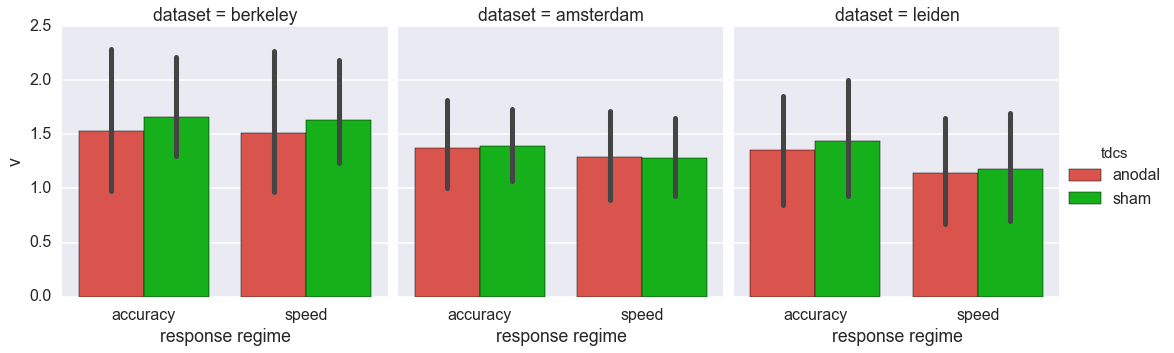

In [356]:
sns.factorplot('response regime','v','tdcs', df_par, col='dataset', col_order=['berkeley', 'amsterdam', 'leiden'])

## T0

In [47]:
df_par = params.melted_parameters('t0')
df_par['dataset'] = df_par.subj_idx.map(lambda x: x[0])
df_par['dataset'] = df_par.dataset.map({'S':'berkeley',
                                        'A':'amsterdam',
                                        'L':'leiden'})

df_par['response regime'] = df_par['acc_spd'].map({'acc':'accuracy', 'spd':'speed'})

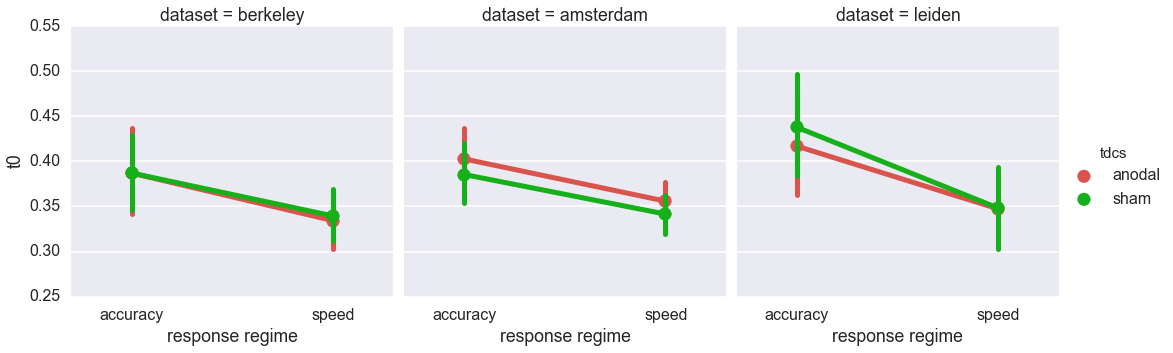

In [48]:
sns.factorplot('response regime','t0','tdcs', df_par[df_par.subj_idx != 'S1'], col='dataset', col_order=['berkeley', 'amsterdam', 'leiden'])

In [51]:
df_par.groupby(['dataset', 'acc_spd', 'response regime']).agg([np.mean, np.std])

t0          
                                       mean       std
dataset   acc_spd response regime                    
amsterdam acc     accuracy         0.394090  0.068792
          spd     speed            0.348713  0.043453
berkeley  acc     accuracy         0.387270  0.085012
          spd     speed            0.339680  0.060602
leiden    acc     accuracy         0.427375  0.110417
          spd     speed            0.347786  0.082148

### Berkeley

In [71]:
%%R -i df_par

library('BayesFactor')

df_par = df_par[df_par['dataset'] == 'berkeley', ]
print(summary(aov(t0 ~ acc_spd*tdcs  + Error(subj_idx ), data=df_par)))

bf = anovaBF(t0 ~ acc_spd*tdcs , data=df_par, whichRandom=c("subj_idx", "dataset"), whichModel="top", iterations = 100000)
bf = recompute(bf, iterations = 500000)

print(bf)
print(1/bf)

print(bf[1] / bf[3])

print(bf[1] / bf[4])


Error: subj_idx
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 14 0.2385 0.01704               

Error: Within
             Df  Sum Sq Mean Sq F value   Pr(>F)    
acc_spd       1 0.03397 0.03397  18.615 9.51e-05 ***
tdcs          1 0.00081 0.00081   0.442     0.51    
acc_spd:tdcs  1 0.00014 0.00014   0.079     0.78    
Residuals    42 0.07665 0.00182                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  |======================================================================| 100%
  |======================================================================| 100%
Bayes factor top-down analysis
--------------
When effect is omitted from acc_spd + tdcs + acc_spd:tdcs , BF is...
[1] Omit acc_spd:tdcs : 2.90072   ±0.41%
[2] Omit tdcs         : 3.625404  ±0.41%
[3] Omit acc_spd      : 0.2944626 ±0.89%

Against denominator:
  t0 ~ acc_spd + tdcs + acc_spd:tdcs 
---
Bayes factor type: BFlinearModel, JZS

                               denominator
numera

### Amsterdam

In [72]:
%%R -i df_par

library('BayesFactor')

df_par = df_par[df_par['dataset'] == 'amsterdam', ]
print(summary(aov(t0 ~ acc_spd*tdcs  + Error(subj_idx ), data=df_par)))

bf = anovaBF(t0 ~ acc_spd*tdcs , data=df_par, whichRandom=c("subj_idx", "dataset"), whichModel="top", iterations = 100000)
bf = recompute(bf, iterations = 500000)

print(bf)
print(1/bf)

print(bf[1] / bf[3])

print(bf[1] / bf[4])


Error: subj_idx
          Df Sum Sq  Mean Sq F value Pr(>F)
Residuals 14 0.1302 0.009301               

Error: Within
             Df  Sum Sq  Mean Sq F value   Pr(>F)    
acc_spd       1 0.03089 0.030886  22.366 2.55e-05 ***
tdcs          1 0.00375 0.003753   2.717    0.107    
acc_spd:tdcs  1 0.00003 0.000032   0.023    0.880    
Residuals    42 0.05800 0.001381                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  |======================================================================| 100%
  |======================================================================| 100%
Bayes factor top-down analysis
--------------
When effect is omitted from acc_spd + tdcs + acc_spd:tdcs , BF is...
[1] Omit acc_spd:tdcs : 2.870883   ±0.24%
[2] Omit tdcs         : 2.314953   ±0.47%
[3] Omit acc_spd      : 0.08373917 ±0.31%

Against denominator:
  t0 ~ acc_spd + tdcs + acc_spd:tdcs 
---
Bayes factor type: BFlinearModel, JZS

                               denomina

### Leiden

In [73]:
%%R -i df_par

library('BayesFactor')

df_par = df_par[df_par['dataset'] == 'leiden', ]
print(summary(aov(t0 ~ acc_spd*tdcs  + Error(subj_idx ), data=df_par)))

bf = anovaBF(t0 ~ acc_spd*tdcs , data=df_par, whichRandom=c("subj_idx", "dataset"), whichModel="top", iterations = 100000)
bf = recompute(bf, iterations = 500000)

print(bf)
print(1/bf)

print(bf[1] / bf[3])

print(bf[1] / bf[4])


Error: subj_idx
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 13 0.4006 0.03082               

Error: Within
             Df  Sum Sq Mean Sq F value  Pr(>F)    
acc_spd       1 0.08868 0.08868  32.115 1.5e-06 ***
tdcs          1 0.00167 0.00167   0.606   0.441    
acc_spd:tdcs  1 0.00141 0.00141   0.509   0.480    
Residuals    39 0.10770 0.00276                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  |======================================================================| 100%
  |======================================================================| 100%
Bayes factor top-down analysis
--------------
When effect is omitted from acc_spd + tdcs + acc_spd:tdcs , BF is...
[1] Omit acc_spd:tdcs : 2.699713   ±0.33%
[2] Omit tdcs         : 3.458761   ±0.33%
[3] Omit acc_spd      : 0.08719624 ±0.63%

Against denominator:
  t0 ~ acc_spd + tdcs + acc_spd:tdcs 
---
Bayes factor type: BFlinearModel, JZS

                               denominator
numerato

### All

In [75]:
%%R -i df_par


print(summary(aov(t0 ~ acc_spd*tdcs  + Error(subj_idx + dataset), data=df_par)))

bf = anovaBF(t0 ~ acc_spd*tdcs , data=df_par, whichRandom=c("subj_idx", "dataset"), whichModel="top", iterations = 100000)
bf = recompute(bf, iterations = 500000)

print(bf)
print(1/bf)

print(bf[1] / bf[3])

print(bf[1] / bf[4])


Error: subj_idx
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 43 0.7867 0.01829               

Error: Within
              Df  Sum Sq Mean Sq F value   Pr(>F)    
acc_spd        1 0.14304 0.14304  70.828 6.39e-14 ***
tdcs           1 0.00002 0.00002   0.008    0.931    
acc_spd:tdcs   1 0.00012 0.00012   0.058    0.810    
Residuals    129 0.26052 0.00202                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
  |======================================================================| 100%
  |======================================================================| 100%
Bayes factor top-down analysis
--------------
When effect is omitted from acc_spd + tdcs + acc_spd:tdcs , BF is...
[1] Omit acc_spd:tdcs : 4.454539     ±0.39%
[2] Omit tdcs         : 6.114893     ±0.39%
[3] Omit acc_spd      : 0.0001616464 ±0.71%

Against denominator:
  t0 ~ acc_spd + tdcs + acc_spd:tdcs 
---
Bayes factor type: BFlinearModel, JZS

                               deno

## Drift rate

In [10]:
import seaborn as sns

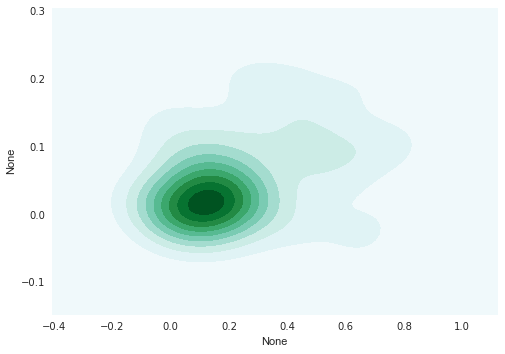

In [20]:
sns.kdeplot(diff_a, diff_t0, shade=True)

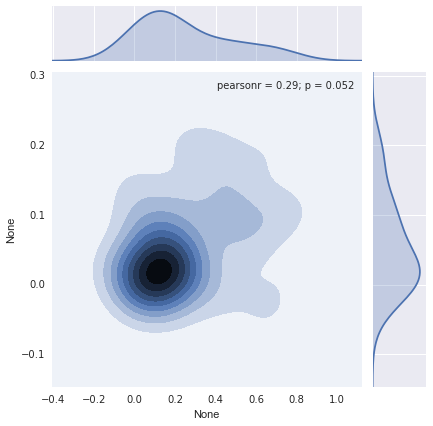

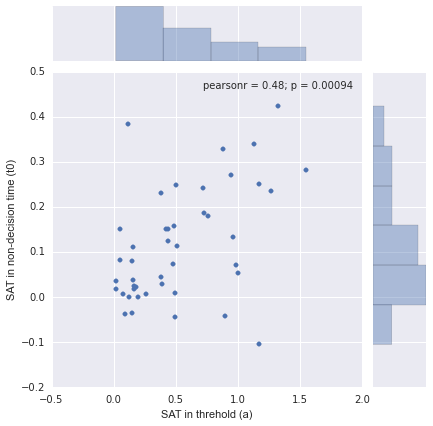

In [36]:
import pandas

diff_a = (params.parameters.a_acc_anodal + params.parameters.a_acc_sham) - (params.parameters.a_spd_anodal + params.parameters.a_spd_sham)
diff_t0 = (params.parameters.t0_acc_anodal + params.parameters.t0_acc_sham) - (params.parameters.t0_spd_anodal + params.parameters.t0_spd_sham)

tmp = pandas.DataFrame({'SAT in threhold (a)':diff_a, 'SAT in non-decision time (t0)':diff_t0})
sns.jointplot('SAT in threhold (a)', 'SAT in non-decision time (t0)', data=tmp)

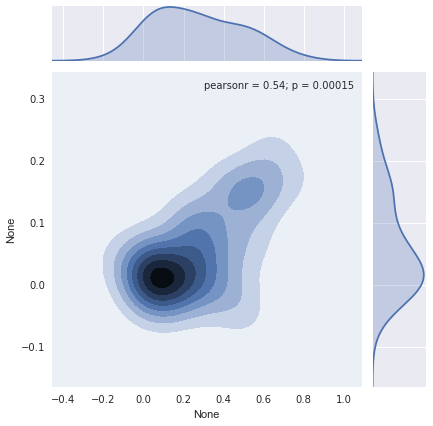

In [23]:
diff_a = params.parameters.a_acc_sham - params.parameters.a_spd_sham
diff_t0 = params.parameters.t0_acc_sham - params.parameters.t0_spd_sham
sns.jointplot(diff_a, diff_t0, kind='kde')

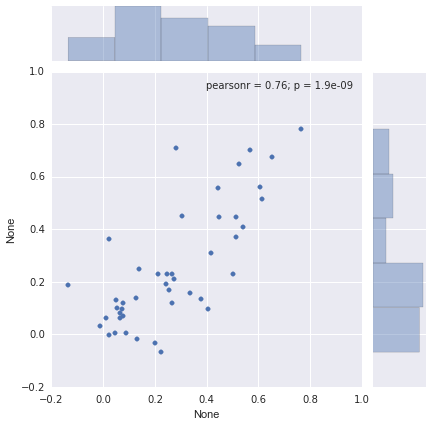

In [24]:
sns.jointplot(params.parameters.a_acc_sham - params.parameters.a_spd_sham, params.parameters.a_acc_anodal - params.parameters.a_spd_anodal)

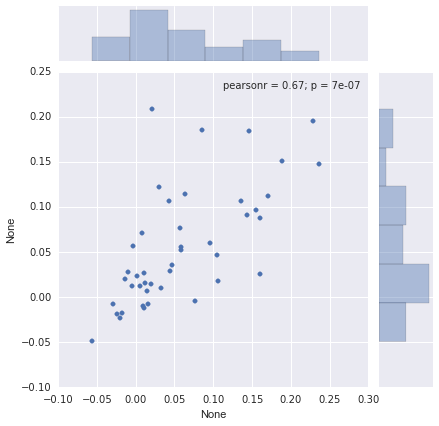

In [25]:
sns.jointplot(params.parameters.t0_acc_sham - params.parameters.t0_spd_sham, params.parameters.t0_acc_anodal - params.parameters.t0_spd_anodal)

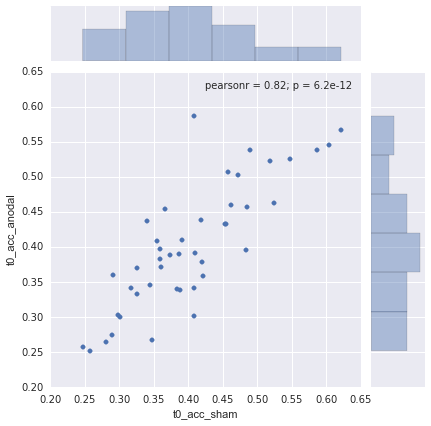

In [26]:
sns.jointplot(params.parameters.t0_acc_sham, params.parameters.t0_acc_anodal)

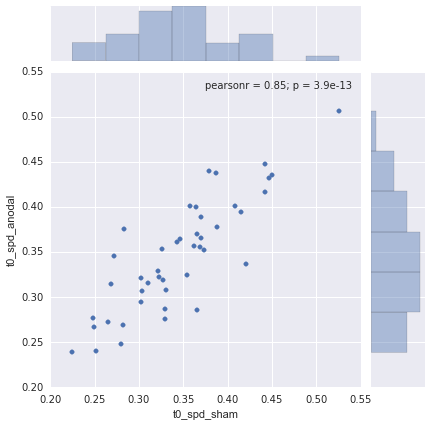

In [27]:
sns.jointplot(params.parameters.t0_spd_sham, params.parameters.t0_spd_anodal)